## 라이브러리 가져오기

In [119]:
import numpy as np       # 수치 계산 (행렬, 수학 함수 등)
import pandas as pd      # 데이터프레임 처리 및 분석
import matplotlib        # 시각화용 도구
import sklearn           # 머신러닝 모델 도구들

# 고급 시각화 기능을 제공하는 seaborn 라이브러리를 불러옴 (matplotlib 기반의 스타일 향상된 시각화 지원)
import seaborn as sns

# 파이썬 인터프리터와 관련된 정보를 얻기 위한 sys 모듈을 불러옴 (버전 정보 등 시스템 관련 기능 포함)
import sys

# 라이브러리의 현재 버전을 출력
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("scikit-learn version:", sklearn.__version__)
print("seaborn version:", sns.__version__)
print("Python version:", sys.version)


numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.1
scikit-learn version: 1.6.1
seaborn version: 0.13.2
Python version: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]


In [120]:
# 선형 회귀 분석을 위한 LinearRegression 불러오기
# 시각화를 위한 matplotlib과 seaborn 불러오기
# 특성 정규화를 위한 PowerTransformer
# 표준화(평균=0, 표준편차=1)를 위한 StandardScaler 불러오기
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


# 데이터를 훈련용(train)과 테스트용(test)으로 나누기 위한 함수 임포트
from sklearn.model_selection import train_test_split

# 회귀 모델의 성능 평가 지표들을 임포트
# 평균 제곱 오차(mean_squared_error), 평균 절대 오차(mean_absolute_error), 결정계수(R² score)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 경고 메시지를 무시하도록 설정하는 warnings 모듈 임포트
import warnings

# 실행 중 발생하는 경고 메시지를 화면에 표시하지 않도록 설정
warnings.filterwarnings("ignore")


## 데이터 불러오기

In [121]:
# CSV 파일을 읽어서 df라는 이름의 데이터프레임으로 저장
df = pd.read_csv('D:\\자료 MK\\Machine learning-MK\\Real estate.csv')


In [122]:
# 데이터 상위 5줄 미리보기
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### ✅ 열 이름과 의미

| 원래 열 이름 | 한글 해석 |
|--------------|------------|
| No | 번호 |
| X1 transaction date | 거래일 |
| X2 house age | 주택 연식 |
| X3 distance to the nearest MRT station | 가장 가까운 MRT(지하철)역까지의 거리 |
| X4 number of convenience stores | 인근 편의점 수 |
| X5 latitude | 위도 |
| X6 longitude | 경도 |
| Y house price of unit area | 단위 면적당 주택 가격 |


## 데이터 전처리

In [123]:
# 'No'라는 열 제거 (분석에 필요 없는 일련번호)
df.drop(columns=["No"], inplace=True)

# index라는 텍스트 출력 (실제 인덱스를 출력하는 건 아님)
print("index")


index


In [124]:
# 데이터 확인
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


X1 transaction date를 보면 연도, 월, 일이 이상하게 되어있음으로

X1 transaction date를 연도, 월, 일로 분리 해야함

In [125]:
# 'X1 transaction date' 열을 연도, 월, 일로 분리하여 새로운 'Year', 'Month', 'Day' 열에 저장

# 1. 연도 추출: 소수점 앞 정수만 추출
df['Year'] = df['X1 transaction date'].apply(lambda x: int(x))  # 예: 2013.25 → 2013

# 2. 월 추출: 소수점 부분에 12를 곱해 월로 변환
df['Month'] = df['X1 transaction date'].apply(lambda x: int((x - int(x)) * 12) + 1)
# 예: 2013.25 → 0.25 * 12 = 3 → 3월

# 3. 일수 추출: 소수점 부분에 약간 더 정밀한 계산으로 일수를 추정
df['Day'] = df['X1 transaction date'].apply(lambda x: int((x - int(x)) * 365.25 / 12))
# 예: 0.25 → 0.25 * 365.25 / 12 ≈ 7.6 → 8일
# 윤년 포함, 1개월 평균 = 30.44일 , 반올림

# 결과 확인
print(df)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

| 인덱스(Index) | 거래일(X1 transaction date) | 주택 연식(X2 house age) | MRT역까지 거리(X3 distance to MRT) | 편의점 수(X4 convenience stores) | 위도(X5 latitude) | 경도(X6 longitude) | 단위면적당 주택 가격(Y house price of unit area) |
|----------------|-----------------------------|--------------------------|-------------------------------------|----------------------------------|-------------------|--------------------|--------------------------------------------------|
| 0              | 2012.917                    | 32.0                     | 84.87882                            | 10                               | 24.98298          | 121.54024          | 37.9                                             |
| 1              | 2012.917                    | 19.5                     | 306.59470                           | 9                                | 24.98034          | 121.53951          | 42.2                                             |
| 2              | 2013.583                    | 13.3                     | 561.98450                           | 5                                | 24.98746          | 121.54391          | 47.3                                             |
| 3              | 2013.500                    | 13.3                     | 561.98450                           | 5                                | 24.98746          | 121.54391          | 54.8                                             |
| 4              | 2012.833                    | 5.0                      | 390.56840                           | 5                                | 24.97937          | 121.54245          | 43.1                                             |


데이터가 제대로 바뀌지 않음

In [126]:
# Day 열에 0이 있으면 1로 바꿈 (0일은 실제 날짜에 없음)
df['Day'] = df['Day'].replace(0, 1)

# 연, 월, 일을 합쳐서 datetime 형식의 'Transaction Date' 열 생성
df['Transaction Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# 이제 불필요한 중간 컬럼 정리 (연, 월, 일, 원래 날짜 데이터 삭제)
df.drop(columns=['Year', 'Month', 'Day', 'X1 transaction date'], inplace=True)

# 결과 확인: 변환된 데이터프레임의 앞부분 출력
print(df.head())


   X2 house age  X3 distance to the nearest MRT station  \
0          32.0                                84.87882   
1          19.5                               306.59470   
2          13.3                               561.98450   
3          13.3                               561.98450   
4           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area Transaction Date  
0                        37.9       2012-12-27  
1                        42.2       2012-12-27  
2                        47.3       2013-07-17  
3                        54.8       2013-07-15  
4        

| 인덱스(Index) | 주택 연식(X2 house age) | MRT 역까지 거리(X3 distance to MRT) | 편의점 수(X4 convenience stores) | 위도(X5 latitude) | 경도(X6 longitude) | 단위면적당 주택 가격(Y house price of unit area) | 거래일(Transaction Date) |
|---------------|--------------------------|--------------------------------------|----------------------------------|--------------------|---------------------|---------------------------------------------------|--------------------------|
| 0             | 32.0                     | 84.87882                             | 10                               | 24.98298           | 121.54024           | 37.9                                              | 2012-12-27               |
| 1             | 19.5                     | 306.59470                            | 9                                | 24.98034           | 121.53951           | 42.2                                              | 2012-12-27               |
| 2             | 13.3                     | 561.98450                            | 5                                | 24.98746           | 121.54391           | 47.3                                              | 2013-07-17               |
| 3             | 13.3                     | 561.98450                            | 5                                | 24.98746           | 121.54391           | 54.8                                              | 2013-07-15               |
| 4             | 5.0                      | 390.56840                            | 5                                | 24.97937           | 121.54245           | 43.1                                              | 2012-10-25               |


X1 transaction date가 칼럼에서 없어지고 Transaction Date 캄럼이 생긴것을 확인

In [127]:
# 위도(X5 latitude)와 경도(X6 longitude)를 결합하여 새로운 변수 'Location' 생성
# 'Location'은 각 위치의 위도와 경도가 평균 위치와 얼마나 떨어져 있는지를 나타내는 값으로 계산
# np.sqrt를 사용하여 유클리드 거리를 계산 (평균 위도 및 경도와의 차이를 제곱한 후 합산, 그 후 제곱근을 취함)
df['Location'] = np.sqrt((df['X5 latitude'] - df['X5 latitude'].mean())**2 + (df['X6 longitude'] - df['X6 longitude'].mean())**2)

# 'X5 latitude'와 'X6 longitude' 열을 삭제(drop)
# 'axis=1'은 열을 삭제한다는 의미, 원본 DataFrame에서 직접 삭제되도록 'df'에 할당
df = df.drop(['X5 latitude', 'X6 longitude'], axis=1)

# 결과를 출력하여 'Location' 열이 잘 생성되었는지 확인
print(df.head())


   X2 house age  X3 distance to the nearest MRT station  \
0          32.0                                84.87882   
1          19.5                               306.59470   
2          13.3                               561.98450   
3          13.3                               561.98450   
4           5.0                               390.56840   

   X4 number of convenience stores  Y house price of unit area  \
0                               10                        37.9   
1                                9                        42.2   
2                                5                        47.3   
3                                5                        54.8   
4                                5                        43.1   

  Transaction Date  Location  
0       2012-12-27  0.015554  
1       2012-12-27  0.012873  
2       2013-07-17  0.021235  
3       2013-07-15  0.021235  
4       2012-10-25  0.013767  


| 인덱스(Index) | 주택 연식(X2 house age) | MRT 역까지 거리(X3 distance to MRT) | 편의점 수(X4 convenience stores) | 단위면적당 주택 가격(Y house price of unit area) | 거래일(Transaction Date) | 위치 점수(Location) |
|---------------|--------------------------|--------------------------------------|----------------------------------|---------------------------------------------------|----------------------------|----------------------|
| 0             | 32.0                     | 84.87882                             | 10                               | 37.9                                              | 2012-12-27                 | 0.015554             |
| 1             | 19.5                     | 306.59470                            | 9                                | 42.2                                              | 2012-12-27                 | 0.012873             |
| 2             | 13.3                     | 561.98450                            | 5                                | 47.3                                              | 2013-07-17                 | 0.021235             |
| 3             | 13.3                     | 561.98450                            | 5                                | 54.8                                              | 2013-07-15                 | 0.021235             |
| 4             | 5.0                      | 390.56840                            | 5                                | 43.1                                              | 2012-10-25                 | 0.013767             |


x5 latitude(위도)와 x6 longitude(경도) 칼럼이 살아지고 Location 칼럼으로 합쳐진것을 확인


In [128]:
# DataFrame(df)의 형태(shape)를 출력하는 코드
# .shape 속성은 DataFrame의 행(row)과 열(column)의 개수를 튜플 형태로 반환
# 예: (행 개수, 열 개수) 형태로 출력됨
df.shape


(414, 6)

특성 5개, 타겟 1개

In [129]:
# DataFrame(df)의 요약 정보를 출력하는 코드
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   X2 house age                            414 non-null    float64       
 1   X3 distance to the nearest MRT station  414 non-null    float64       
 2   X4 number of convenience stores         414 non-null    int64         
 3   Y house price of unit area              414 non-null    float64       
 4   Transaction Date                        414 non-null    datetime64[ns]
 5   Location                                414 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 19.5 KB


| 인덱스(Index) | 컬럼명(Column)                              | 결측치가 아닌 값 개수(Non-Null Count) | 데이터 타입(Dtype)     | 설명 |
|----------------|-----------------------------------------------|-----------------------------|--------------------------|------|
| 0              | X2 house age                                  | 414                         | float64                  | 주택 연식 (년) |
| 1              | X3 distance to the nearest MRT station        | 414                         | float64                  | 가장 가까운 MRT(지하철역)까지의 거리 (미터) |
| 2              | X4 number of convenience stores               | 414                         | int64                    | 인근 편의점 수 |
| 3              | Y house price of unit area                    | 414                         | float64                  | 단위 면적당 주택 가격 (NT$/평) |
| 4              | Transaction Date                              | 414                         | datetime64[ns]           | 거래일 (년-월-일 형식) |
| 5              | Location                                      | 414                         | float64                  | 위치 기반 점수 (정규화된 지표) |


### ✅df.info()가 알려주는 중요 정보

총 행(row) 수	데이터가 몇 개의 샘플(행)로 이루어져 있는지


열(column) 이름과 개수	어떤 특성(feature)이 있는지

각 열의 자료형(dtype)	숫자인지, 문자열인지, 날짜인지 등을 확인

Non-Null 값 수	결측값(null, NaN)이 얼마나 있는지 파악 가능

메모리 사용량	데이터 크기 (메모리 최적화가 필요할 수 있음)


### ✅전반적인 상태 — 좋음
총 414개 행 → 적당한 크기의 데이터셋. 간단한 회귀/분류 모델을 테스트하기에 충분함.

결측치 없음 (non-null 414) → 모든 열에 결측치가 없어서 전처리 단계에서 결측치 처리 고민은 안 해도 됨.

열 개수 6개 → 피처 수가 많지는 않지만, 직관적으로 해석 가능한 변수들.


### ✅ 열별 해석

| 열 이름 | 자료형 | 의미 |
|---------|--------|------|
| X2 house age | float64 | 건물 나이 |
| X3 distance to the nearest MRT station | float64 | MRT(지하철)와의 거리 |
| X4 number of convenience stores | int64 | 편의점 수 |
| Y house price of unit area | float64 | 타깃 변수 (가격) |
| Transaction Date | datetime64[ns] | 거래 일자 |
| Location | float64 | 위도/경도 결합값 |


In [130]:
# DataFrame(df)에서 각 열의 결측값(null 값)의 개수를 계산하는 코드
df.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
Transaction Date                          0
Location                                  0
dtype: int64


| 컬럼명(Column)                             | 결측치 수(Missing Values) | 설명 |
|--------------------------------------------|----------------------------|------|
| X2 house age                                | 0                          | 주택 연식 (년) |
| X3 distance to the nearest MRT station      | 0                          | 가장 가까운 MRT(지하철역)까지의 거리 (미터) |
| X4 number of convenience stores             | 0                          | 인근 편의점 수 |
| Y house price of unit area                  | 0                          | 단위 면적당 주택 가격 (NT$/평) |
| Transaction Date                            | 0                          | 거래일 (년-월-일 형식) |
| Location                                    | 0                          | 위치 기반 점수 (정규화된 지표) |


Null 값이 없다는 것을 한번 더 확인

In [131]:
# DataFrame(df)에서 중복치가 있는지 확인
df.duplicated().sum()

0

중복치가 없다는것을 확인

In [132]:
# DataFrame(df)에서 각 열(column)마다 고유한 값(unique)의 개수를 계산하는 코드
# .nunique()는 각 열에서 중복되지 않는 고유 값의 개수를 반환
# 각 열에 대해 고유 값이 몇 개 있는지 확인할 수 있으며, 범주형 데이터의 특성을 파악하는 데 유용
df.nunique()


X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
Y house price of unit area                270
Transaction Date                           12
Location                                  259
dtype: int64

| 열 이름                                     | 고유값 수 | 해석                         | 연속형 vs 이산형 판단            |
| ---------------------------------------- | ----- | -------------------------- | ------------------------ |
| `X2 house age`                           | 236   | 주택 연식이 236가지 → 소수점 포함, 다양함 | **연속형 (수치형)**            |
| `X3 distance to the nearest MRT station` | 259   | 거리이므로 실수형 가능성이 큼           | **연속형 (수치형)**            |
| `X4 number of convenience stores`        | 11    | 정수 값, 편의점 개수               | **이산형 (정수형)**            |
| `Y house price of unit area`             | 270   | 가격 다양성 큼, 소수점일 확률 높음       | **연속형 (타깃 수치형)**         |
| `Transaction Date`                       | 12    | 거래일 수가 적음 (12개월 추정)        | **이산형 (범주형으로도 사용 가능)**   |
| `Location`                               | 259   | 위도+경도 결합값 추정, 값이 다양함       | **연속형 (수치형)** 또는 가공된 특이값 |

### 📌 참고

이산형: 정해진 개수만큼의 값만 가짐 (예: 편의점 수는 0~11개 같은 정수)

연속형: 실수 범위로 값이 매우 다양함 (예: 나이 25.3세, 거리 125.7m 등)

In [133]:
# 'Transaction Date' 열에서 고유한 값들을 배열 형태로 반환하는 코드
# .unique()는 해당 열에서 중복된 값을 제거하고, 고유한 값만 반환
# 'Transaction Date' 열에 포함된 고유한 날짜 값들을 확인할 수 있음
# 결과는 numpy 배열 형식으로 반환되며, 여러 날짜 값들이 나열됨
df["Transaction Date"].unique()


<DatetimeArray>
['2012-12-27 00:00:00', '2013-07-17 00:00:00', '2013-07-15 00:00:00',
 '2012-10-25 00:00:00', '2012-09-20 00:00:00', '2013-06-12 00:00:00',
 '2013-01-02 00:00:00', '2013-04-10 00:00:00', '2013-04-07 00:00:00',
 '2012-10-22 00:00:00', '2013-01-01 00:00:00', '2013-03-05 00:00:00']
Length: 12, dtype: datetime64[ns]

| 날짜 (Date)           | 
|----------------------|
| 2012-12-27 00:00:00  | 
| 2013-07-17 00:00:00  | 
| 2013-07-15 00:00:00  | 
| 2012-10-25 00:00:00  |
| 2012-09-20 00:00:00  |
| 2013-06-12 00:00:00  | 
| 2013-01-02 00:00:00  | 
| 2013-04-10 00:00:00  | 
| 2013-04-07 00:00:00  | 
| 2012-10-22 00:00:00  | 
| 2013-01-01 00:00:00  | 
| 2013-03-05 00:00:00  |


## 데이터 탐색: 시각화

## 📊 연속형 변수 시각화

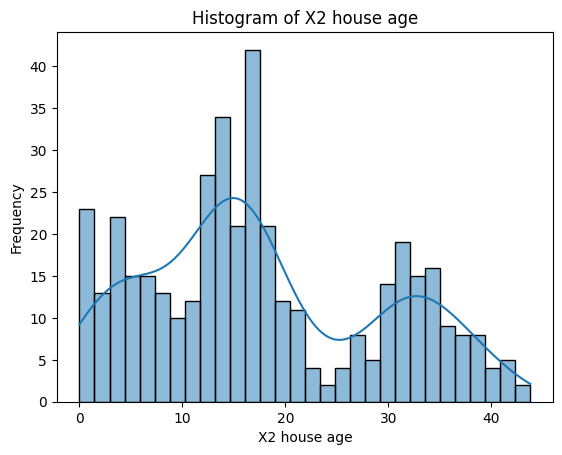

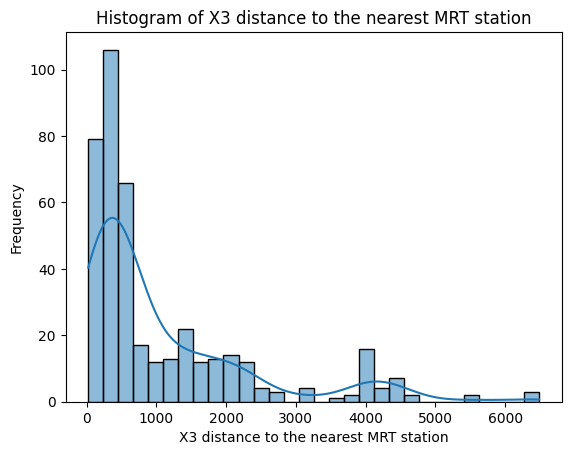

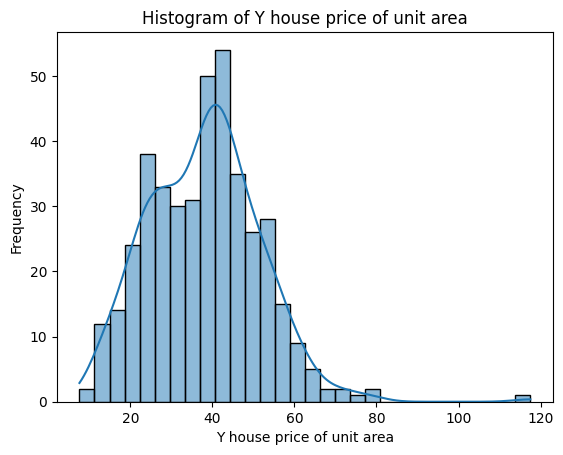

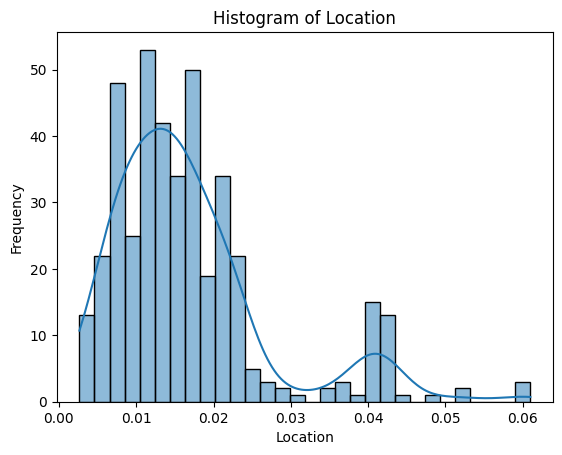

In [134]:
# seaborn과 matplotlib를 임포트하여 시각화 도구를 준비
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수들 리스트
# 각 변수는 주택의 특성과 관련된 속성들로, 주택 가격, 연식, MRT 역과의 거리 등이 포함됨
# 'Location'은 연속형이 아닐 가능성이 있으므로 주의하여 다뤄야 함
continuous_cols = [
    "X2 house age",                             # 주택의 연식
    "X3 distance to the nearest MRT station",   # 가장 가까운 MRT역까지의 거리
    "Y house price of unit area",               # 단위 면적당 주택 가격
    "Location"                                  # (주의) 연속형이 아닐 가능성 있음
]

# 각 연속형 변수에 대해 히스토그램을 그리기 위한 반복문
for col in continuous_cols:
    # 새로운 그림(figure)을 크기 (6, 4)로 생성
    plt.Figure(figsize=(6, 4))
    
    # seaborn의 histplot을 사용하여 히스토그램과 커널 밀도 추정(KDE)을 그린다
    # bins=30은 히스토그램의 구간을 30개로 나눈다는 의미
    sns.histplot(df[col], kde=True, bins=30)
    
    # 그래프 제목, x축 레이블, y축 레이블을 설정
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # 그래프를 출력
    plt.show()


### 📊 연속형 변수 시각화 코드 설명

이 코드는 주어진 데이터프레임 df에서 **연속형 변수(continuous variables)** 들의 분포를 시각화하기 위해 작성되었습니다. 

각 변수에 대해 **히스토그램(histogram)** 과 **커널 밀도 추정(kde: Kernel Density Estimation)** 을 함께 그려줍니다.

### 🔁 코드 동작 설명

리스트에 있는 각 변수에 대해:

sns.histplot()을 사용하여 히스토그램과 KDE 곡선을 그림

plt.title, plt.xlabel, plt.ylabel로 그래프에 제목과 라벨 추가

plt.show()로 결과 출력

### 🎯 목적

각 변수의 분포 형태를 직관적으로 파악할 수 있음

정규분포 여부

이상치(outlier) 존재 여부

왜도(skewness) 등

데이터 전처리 및 모델링 전, **탐색적 데이터 분석(EDA)** 의 일환으로 활용됨

## 📊 이산형 변수의 분포 시각화

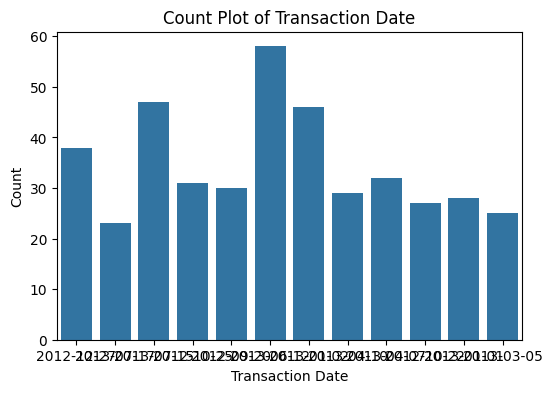

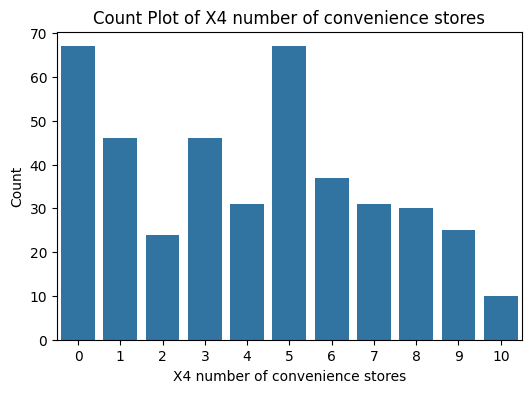

In [135]:
# 범주형 변수들 리스트
# 'Transaction Date'는 거래 날짜, 'X4 number of convenience stores'는 편의점 개수
# 범주형 변수의 분포를 시각화하기 위해 countplot을 사용
categorical_cols = [
    "Transaction Date",  # 거래 날짜
    "X4 number of convenience stores",  # 편의점 개수
]

# 각 범주형 변수에 대해 count plot을 그리기 위한 반복문
for col in categorical_cols:
    # 새로운 그림(figure)을 크기 (6, 4)로 생성
    plt.figure(figsize=(6, 4))
    
    # seaborn의 countplot을 사용하여 각 범주별 데이터 개수를 시각화
    # 'x=col'은 각 범주형 변수에 대해 countplot을 그린다는 의미
    sns.countplot(x=col, data=df)
    
    # 그래프 제목, x축 레이블, y축 레이블을 설정
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # x축 레이블의 글자가 겹치지 않도록 자동으로 조정
    plt.xticks()  # 글자 겹침 방지
    
    # 그래프를 출력
    plt.show()


 plt.xticks()코드를 사용했음에도 불구하고 글자가 많이 곂침

### 📊 이산형 변수의 분포 시각화  코드 설명

이 코드는 데이터프레임 df에서 **이산형 변수(discrete variables)** 들의 분포를 시각화하기 위해 작성되었습니다. 

각 이산형 변수에 대해 Count Plot을 그려 각 값의 빈도수를 확인할 수 있습니다.

### 🔁 코드 동작 설명

변수별로 반복문 실행:

각 이산형 변수에 대해 sns.countplot()을 호출하여 빈도수 그래프를 생성합니다.

그래프 설정:

plt.figure(figsize=(6, 4)): 그래프 크기를 설정합니다.

plt.title(), plt.xlabel(), plt.ylabel(): 그래프에 제목과 축 레이블을 추가합니다.

plt.xticks(): x축 레이블 겹침 방지를 위해 자동으로 레이블을 회전시키거나 적절하게 조정합니다.

그래프 출력:

plt.show(): 그래프를 화면에 출력합니다.

### 🎯 목적

각 이산형 변수의 값에 대한 빈도수를 시각적으로 확인하여 데이터의 분포를 이해하는 것이 목적입니다.

예: 특정 거래 날짜에 거래가 몰려 있는지, 편의점의 분포가 어떻게 되는지 등의 정보를 파악할 수 있습니다.

색상을 활용하여 그래프가 보다 직관적이고 보기 좋게 표시됩니다



## 📊 상관관계 행렬(Correlation Matrix) 히트맵 시각화

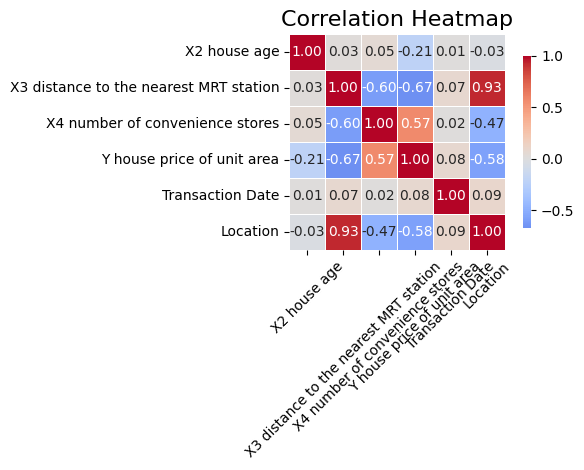

In [136]:
# DataFrame(df)의 상관관계 행렬을 계산
# .corr()는 각 열 간의 Pearson 상관계수를 계산하여 상관관계 행렬을 반환
# 상관계수는 -1에서 1 사이의 값으로, 1은 완전한 양의 상관관계, -1은 완전한 음의 상관관계, 0은 상관관계가 없음을 의미
corr_matrix = df.corr()

# 상관관계 행렬을 시각화하기 위한 히트맵 생성
plt.Figure(figsize=(10, 8))  # 그림의 크기 설정

# seaborn의 heatmap을 사용하여 상관관계 행렬을 시각화
# annot=True는 각 셀에 상관계수 값을 숫자로 표시
# fmt=".2f"는 상관계수를 소수점 둘째 자리까지 표시
# cmap='coolwarm'은 색상 맵을 설정 (양의 상관관계는 따뜻한 색, 음의 상관관계는 차가운 색)
# center=0은 색상의 중심을 0으로 설정하여 양/음 상관관계를 구분
# linewidths=0.5는 셀 간의 경계선 두께를 설정
# square=True는 히트맵을 정사각형 모양으로 만들기 위해 설정
# cbar_kws={"shrink": 0.8}는 색상 바의 크기를 조정
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

# 그래프 제목을 설정
plt.title("Correlation Heatmap", fontsize=16)

# x축, y축 레이블 회전 각도를 설정
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.yticks(rotation=0)   # y축 레이블은 회전하지 않음

# 레이아웃을 자동으로 조정하여 그래프가 잘 보이도록 함
plt.tight_layout()

# 히트맵을 화면에 출력
plt.show()


### 📊 상관관계 행렬(Correlation Matrix) 히트맵 시각화 코드 설명

이 코드는 데이터프레임 df의 **상관관계 행렬(correlation matrix)** 을 계산하고, 이를 **히트맵(heatmap)** 으로 시각화하는 방법을 보여줍니다. 

상관관계 행렬은 변수 간의 선형 관계를 나타내며, 히트맵을 사용하면 이 관계를 직관적으로 시각화할 수 있습니다.

### 🔍 상관관계란?

상관관계는 두 변수 간의 선형 관계를 나타내며, 값은 -1에서 1 사이의 범위를 가집니다.

1: 완전한 양의 상관관계 (두 변수는 완전히 비례)

-1: 완전한 음의 상관관계 (두 변수는 완전히 반비례)

0: 상관관계 없음 (두 변수는 독립적)

상관관계 행렬은 여러 변수들 간의 상관관계를 표 형태로 보여주며, 이를 통해 데이터의 특성 간의 관계를 분석할 수 있습니다.

### 🎯 목적과 활용

변수 간 상관관계 파악:

상관관계 행렬을 통해 각 변수들 간의 선형 관계를 확인할 수 있습니다. 예를 들어, 특정 변수들이 강한 양의 상관관계를 가질 경우, 하나의 변수 값이 증가하면 다른 변수 값도 증가하는 경향이 있음을 알 수 있습니다.

다중 공선성 확인:

상관계수가 1에 가까운 변수들이 두 개 이상 존재할 경우, 이는 다중 공선성 문제를 나타낼 수 있습니다. 이를 해결하려면 중복되는 변수들을 제거하거나 다른 방법을 고려해야 합니다.

특성 선택 (Feature Selection):

상관관계가 높은 변수를 파악하여 모델에 중복된 특성이 포함되지 않도록 합니다. 예를 들어, 두 변수 간 상관계수가 매우 높다면 그 중 하나를 제외해도 모델 성능에 큰 영향을 미치지 않을 수 있습니다.

EDA(탐색적 데이터 분석):

데이터 탐색 과정에서 변수 간의 관계를 파악하는 데 유용하며, 모델링 시 필요한 변수 선택에 중요한 정보를 제공합니다.

### 📌 예시 출력

상관관계 히트맵을 사용하면 변수 간의 상관관계를 직관적으로 파악할 수 있습니다. 예를 들어:

빨간색: 양의 상관관계를 나타내며, 두 변수 간에 비례 관계가 강함을 의미합니다.

파란색: 음의 상관관계를 나타내며, 두 변수 간에 반비례 관계가 있음을 의미합니다.

중간 색: 상관관계가 0에 가까운 변수들로, 두 변수 간에 독립적인 관계가 있음을 나타냅니다.

### 🔑 최종 요약

이 코드는 상관관계 행렬을 계산하고, 이를 히트맵으로 시각화하여 각 변수 간의 관계를 직관적으로 확인할 수 있게 해줍니다.

 이를 통해 데이터 분석과 모델링 과정에서 변수 간의 관계를 잘 이해하고, 불필요한 변수나 중복된 특성을 제거하여 모델 성능을 최적화할 수 있습니다.

## 📊 수치형 변수와 집 가격 간의 관계 시각화

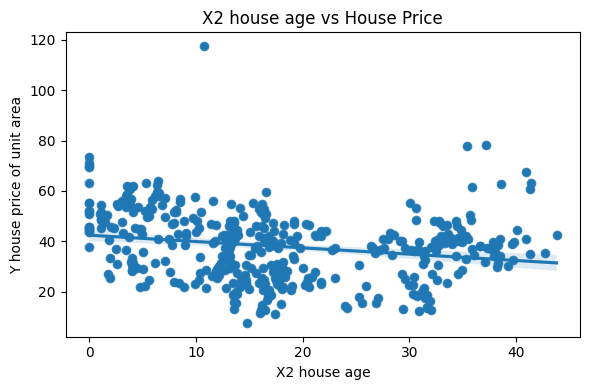

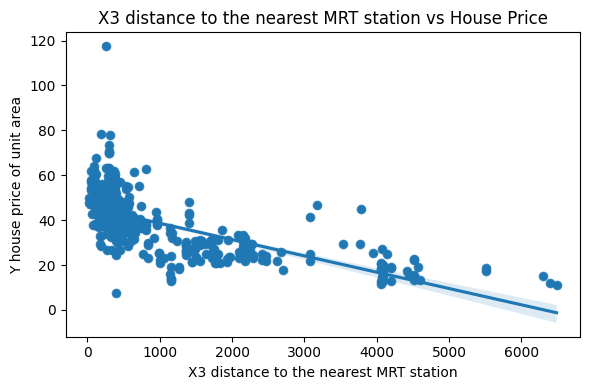

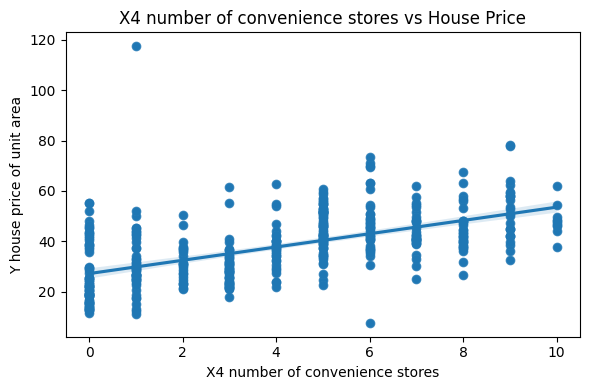

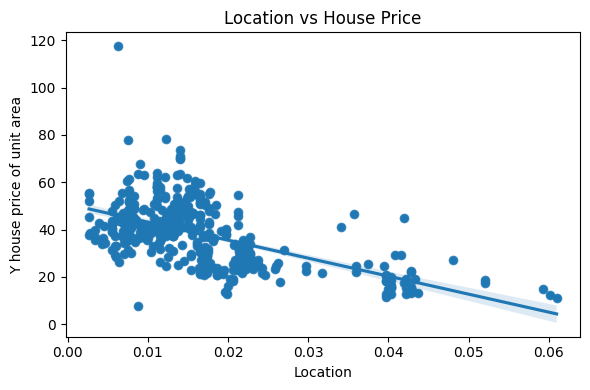

In [137]:
# DataFrame(df)에서 수치형 변수들만 선택하고, 'Y house price of unit area'는 제외
# select_dtypes(include='number')는 데이터프레임에서 수치형 열들을 선택
# drop('Y house price of unit area')는 'Y house price of unit area' 열을 제외하도록 설정
numeric_features = df.select_dtypes(include='number').columns.drop('Y house price of unit area')

# 수치형 변수들에 대해 반복문을 실행
# 각 변수와 'Y house price of unit area' 간의 관계를 산점도와 회귀선으로 시각화
for col in numeric_features:
    # 새로운 그림(figure)을 크기 (6, 4)로 생성
    plt.figure(figsize=(6, 4))
    
    # seaborn의 scatterplot을 사용하여 변수 간 산점도를 그린다
    # x축은 각 수치형 변수, y축은 'Y house price of unit area'
    sns.scatterplot(x=df[col], y=df['Y house price of unit area'])
    
    # 그래프 제목, x축 레이블, y축 레이블을 설정
    plt.title(f'{col} vs House Price')
    plt.xlabel(col)
    plt.ylabel('House Price per Unit Area')
    
    # 레이아웃 자동 조정
    plt.tight_layout()
    
    # 회귀선을 추가하여 산점도에 대한 선형 회귀 결과를 표시
    # regplot은 산점도 위에 선형 회귀선을 추가해줌
    sns.regplot(x=df[col], y=df['Y house price of unit area'])
    
    # 그래프를 출력
    plt.show



### 📊 수치형 변수와 집 가격 간의 관계 시각화 코드 설명
이 코드는 수치형 변수들과 'Y house price of unit area'(단위 면적당 집 가격) 간의 상관관계를 시각화하는 과정입니다. 산점도와 회귀선을 사용하여 각 변수들이 집 가격에 미치는 영향을 분석할 수 있습니다.

### 🔍 목적

이 코드는 수치형 변수와 집 가격 간의 관계를 직관적으로 파악하기 위해 사용됩니다. 주어진 데이터프레임 df에서 수치형 변수들을 추출하고,

각 변수와 'Y house price of unit area' 간의 상관관계를 산점도(scatter plot)와 회귀선(regression line)을 통해 시각적으로 확인합니다.

### 🎯 목적과 활용

#### 변수 간 상관관계 시각화:

산점도를 통해 각 수치형 변수와 'Y house price of unit area' 간의 관계를 시각적으로 파악할 수 있습니다. 

예를 들어, 두 변수 간에 양의 상관관계(positive correlation)가 있으면, 한 변수의 값이 증가함에 따라 다른 변수의 값도 증가하는 경향을 알 수 있습니다.

#### 회귀선 추가:

회귀선을 통해 변수 간의 선형 관계를 명확히 볼 수 있습니다.

회귀선의 기울기가 양수이면 양의 상관관계, 음수이면 음의 상관관계가 있음을 나타냅니다.

데이터 분석 및 특성 선택:

이 코드는 데이터의 각 변수와 목표 변수 간의 관계를 분석하는 **탐색적 데이터 분석(EDA)** 의 일환으로 사용됩니다. 

이를 통해 중요한 변수들을 파악하고, 모델링 시 변수 선택에 유용한 정보를 제공할 수 있습니다.

모델링 전 변수 간 관계 이해:

각 변수들이 목표 변수에 어떤 영향을 미치는지 파악하고, 상관관계가 낮은 변수를 제거하거나 상관관계가 높은 변수를 

강화하는 등의 변수 선택 작업을 할 수 있습니다.

### 🖼️ 예시 출력

각 변수에 대해 산점도가 그려지고, 그 위에 회귀선이 추가됩니다.

예를 들어, 'X2 house age'(집의 나이)와 'Y house price of unit area' 간의 관계를 확인할 수 있습니다.

양의 상관관계: 변수 값이 커짐에 따라 집 가격도 증가하는 경향이 있다면 회귀선은 우상향합니다.

음의 상관관계: 변수 값이 커짐에 따라 집 가격이 감소한다면 회귀선은 우하향합니다.

상관관계 없음: 두 변수 간의 관계가 약하거나 선형이 아니면 산점도가 무작위로 퍼져 있습니다.

### 🔑 최종 요약

이 코드는 수치형 변수들과 'Y house price of unit area' 간의 선형 관계를 산점도와 회귀선을 통해 시각화하여, 

변수들 간의 상관관계를 직관적으로 파악하는 데 유용합니다. 이를 통해 데이터 탐색 및 모델링 전 변수들 간의 관계를 이해하고, 

중요한 변수를 선택하거나 변수 간의 다중 공선성을 파악할 수 있습니다.

## 🕒 'Transaction Date' 컬럼을 Timestamp로 변환 후 회귀선 포함 산점도 시각화

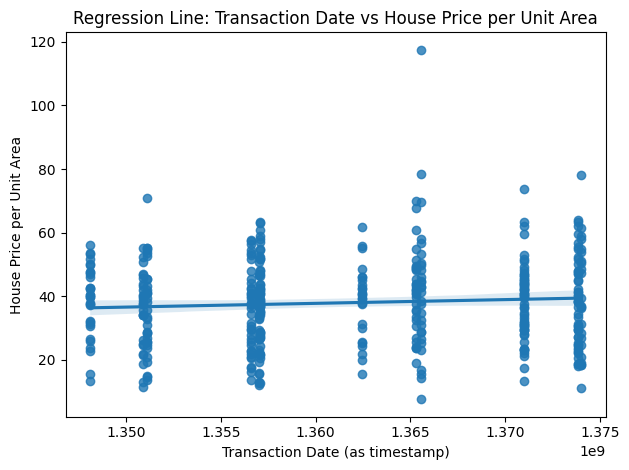

In [138]:
# 'Transaction Date' 열을 timestamp 형식으로 변환
# astype(int)로 'Transaction Date'를 정수로 변환한 후, 초 단위 timestamp로 변환 (10^9으로 나누기)
# Pandas의 'datetime' 객체는 기본적으로 1970-01-01부터의 시간을 나노초 단위로 저장되므로 이를 초 단위로 바꾸기 위해 10^9으로 나눕니다.
# df['DateTime_Stamp'] = df['Transaction Date'].astype(int) / 10**9  # 초 단위 timestamp로 변환
df['DateTime_Stamp'] = df['Transaction Date'].astype('int64') / 10**9

# 회귀선이 포함된 산점도를 그리기 위한 seaborn의 regplot 사용
# x축은 변환된 'DateTime_Stamp' (거래 날짜의 timestamp), y축은 'Y house price of unit area'
sns.regplot(x=df['DateTime_Stamp'], y=df['Y house price of unit area'])

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('Regression Line: Transaction Date vs House Price per Unit Area')
plt.xlabel('Transaction Date (as timestamp)')
plt.ylabel('House Price per Unit Area')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()


### 🕒 'Transaction Date' 컬럼을 Timestamp로 변환 후 회귀선 포함 산점도 시각화 코드 설명 

이 코드는 'Transaction Date' 컬럼을 timestamp 형식으로 변환한 뒤,

이를 'Y house price of unit area'(단위 면적당 집 가격)와 비교하는 회귀선이 포함된 산점도를 그려, 두 변수 간의 관계를 분석합니다.

### 🔍 목적

**'Transaction Date'** 를 timestamp 형식으로 변환하여 시간적 요소를 수치적 변수로 변환합니다.

변환된 timestamp 값과 집 가격 간의 관계를 회귀선이 포함된 산점도를 통해 시각화하여 두 변수 간의 상관관계를 파악합니다.

### 🎯 목적과 활용

#### **시간적 요소를 수치적 변수로 변환:**

'Transaction Date' 컬럼은 원래 날짜/시간 형식이므로 이를 timestamp로 변환하여 수치적으로 다룰 수 있게 만듭니다. 

이를 통해 시간에 따른 변화를 분석할 수 있습니다.

#### **회귀선 포함 산점도로 관계 분석:**

회귀선을 통해 'Transaction Date'(거래 날짜)와 'Y house price of unit area'(집 가격) 간의 선형 관계를 쉽게 확인할 수 있습니다.

예를 들어, 시간이 지나면서 집 가격이 상승하거나 하락하는 경향을 파악할 수 있습니다. 회귀선은 두 변수 간의 추세를 시각적으로 나타냅니다.

#### **데이터의 시간적 변화 이해:**

시간에 따른 집 가격의 변화를 주기적으로 분석할 수 있습니다. 예를 들어, 특정 기간에 가격이 급등하거나 가격이 하락하는 패턴을 발견할 수 있습니다.

#### **모델링에 유용한 정보 제공:**

시간이 집 가격에 영향을 미칠 수 있는 중요한 요소로 작용한다면, 이를 모델링에 포함시킬 수 있습니다. 이 회귀선은 시간의 흐름에 따른 예측에 중요한 역할을 할 수 있습니다.

### 🖼️ 예시 출력

그래프에는 'Transaction Date'(거래 날짜)가 x축으로, 집 가격이 y축으로 표시됩니다. 회귀선이 추가되어, 시간에 따른 집 가격 변화를 직관적으로 파악할 수 있습니다.

회귀선이 우상향하면 시간이 지나면서 집 가격이 상승하는 경향을, 회귀선이 우하향하면 시간이 지나면서 집 가격이 하락하는 경향을 나타냅니다.

회귀선이 수평선에 가까운 경우, 시간에 따른 집 가격의 변화가 미미함을 알 수 있습니다.

### 🔑 최종 요약

이 코드는 **'Transaction Date'**를 timestamp로 변환하여,

시간의 흐름에 따른 'Y house price of unit area'(단위 면적당 집 가격)와의 관계를 회귀선이 포함된 산점도로 시각화합니다. 

이를 통해 시간적 요소가 집 가격에 미치는 영향을 파악하고, 향후 모델링 시 중요한 정보를 제공할 수 있습니다.

## 📊 수치형 데이터의 Box-Cox 변환

In [139]:
# df에서 수치형 데이터만 선택
# select_dtypes(include=['number'])로 수치형 열만 선택하고, 열 이름을 가져옵니다
numeric_features = df.select_dtypes(include=['number']).columns

# df의 복사본을 만들고, 수치형 열에 +1을 추가하여 'df_adjusted'라는 새로운 데이터프레임 생성
# 여기서 수치형 변수에만 +1을 더합니다
df_adjusted = df.copy()
df_adjusted[numeric_features] = df[numeric_features] + 1  # 수치형 열에만 +1 추가

# PowerTransformer 객체를 초기화
# PowerTransformer는 정규화 및 분포 변환을 수행하는 클래스
# method='box-cox'는 Box-Cox 변환을 수행하도록 설정
scaler = PowerTransformer(method='box-cox')

# Box-Cox 변환은 수치형 데이터가 양의 값이어야만 적용 가능하므로, df_adjusted에서 수치형 열에만 변환을 적용
df_transformed = df_adjusted.copy()  # 변환을 적용할 데이터프레임 생성
df_transformed[numeric_features] = scaler.fit_transform(df_adjusted[numeric_features])

# 변환된 데이터 출력
print(df_transformed)


     X2 house age  X3 distance to the nearest MRT station  \
0        1.182955                               -1.768004   
1        0.288757                               -0.589288   
2       -0.241865                               -0.042591   
3       -0.241865                               -0.042591   
4       -1.147002                               -0.370084   
..            ...                                     ...   
409     -0.205009                                1.697912   
410     -1.068366                               -1.709073   
411      0.232628                               -0.369157   
412     -0.769091                               -1.572852   
413     -0.955865                               -1.709073   

     X4 number of convenience stores  Y house price of unit area  \
0                           1.718527                    0.069473   
1                           1.480492                    0.376490   
2                           0.410903                    0.72433

| 인덱스 (Index) | X2 집 연령 (House Age) | X3 역까지 거리 (Distance to MRT) | X4 편의점 수 (Number of Convenience Stores) | Y 단위 면적당 집값 (House Price per Unit Area) | 거래 날짜 (Transaction Date) |
|----------------|-----------------------|--------------------------------------|---------------------------------------------|-----------------------------------------------|---------------------------|
| 0              | 1.182955              | -1.768004                            | 1.718527                                    | 0.069473                                      | 2013-01-01                |
| 1              | 0.288757              | -0.589288                            | 1.480492                                    | 0.376490                                      | 2013-01-01                |
| 2              | -0.241865             | -0.042591                            | 0.410903                                    | 0.724332                                      | 2013-01-01                |
| 3              | -0.241865             | -0.042591                            | 0.410903                                    | 1.208819                                      | 2013-01-01                |
| 4              | -1.147002             | -0.370084                            | 0.410903                                    | 0.439086                                      | 2013-01-01                |
| ...            | ...                   | ...                                  | ...                                         | ...                                           | ...                       |
| 409            | -0.205009             | 1.697912                             | -1.565743                                   | -1.862393                                     | 2013-07-15                |
| 410            | -1.068366             | -1.709073                            | 1.480492                                    | 0.902183                                      | 2013-07-15                |
| 411            | 0.232628              | -0.369157                            | 0.973174                                    | 0.263830                                      | 2013-07-15                |
| 412            | -0.769091             | -1.572852                            | 0.410903                                    | 1.063342                                      | 2013-07-15                |
| 413            | -0.955865             | -1.709073                            | 1.480492                                    | 1.761055                                      | 2013-07-15                |


### 📊 수치형 데이터의 Box-Cox 변환 코드 설명

이 코드는 수치형 변수에 Box-Cox 변환을 적용하는 과정입니다. Box-Cox 변환은 데이터의 분포를 정규 분포에 가깝게 

만들어 주기 위한 방법으로, 머신러닝 모델링 시 정규 분포를 가정하는 알고리즘에 유용합니다

### 🎯 목적

이 코드의 목적은 데이터의 분포를 정규화하여 모델링에 유리한 상태로 변환하는 것입니다.

특히 선형 회귀, 로지스틱 회귀 등 정규 분포를 가정하는 알고리즘에서는 정규화된 데이터가 성능을 높이는 데 도움이 됩니다.

Box-Cox 변환을 통해 비정규 분포를 가진 데이터를 정규 분포에 가까운 형태로 만들 수 있습니다.

### ⚙️ Box-Cox 변환

Box-Cox 변환은 로그 변환과 비슷하지만 더 넓은 범위의 데이터에 적용 가능합니다.

주로 데이터가 음수 또는 0인 경우에 적용할 수 있는 변환 방식입니다.

Box-Cox 변환을 통해 불균형한 데이터를 정규 분포에 맞게 조정할 수 있어, 많은 머신러닝 모델에서 성능을 향상시킬 수 있습니다.

### 📊 변환 전후 비교

변환된 데이터를 시각화하려면, 히스토그램 또는 박스플롯을 사용하여 변환 전후 데이터를 비교하는 것이 유용합니다. 

예를 들어, 변환 전의 데이터가 왜곡된 분포를 가질 때, 변환 후 데이터는 더 정규 분포에 가까운 형태를 띠게 될 것입니다.

### 🔑 최종 요약

이 코드는 수치형 변수들에 Box-Cox 변환을 적용하여 데이터를 정규 분포에 가깝게 변환하는 과정입니다.

이를 통해 모델 성능을 개선할 수 있으며, 변환된 데이터는 비정규 분포로 인한 문제를 해결할 수 있습니다. 이 과정은 특히 회귀 모델이나 기계학습 모델에 유용하게 사용됩니다

## 🌟 StandardScaler를 이용한 데이터 스케일링

In [140]:
# StandardScaler 객체 초기화
# StandardScaler는 각 특성의 평균을 0, 표준편차를 1로 변환하는 방법으로 데이터를 스케일링합니다.
scaler = StandardScaler()

# df_transformed 데이터프레임의 복사본을 만들어 df_scaled에 저장
# 수치형 열에 대해 StandardScaler를 적용하여 평균이 0, 표준편차가 1인 분포로 변환
df_scaled = df_transformed.copy()  
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

# 변환된 데이터 출력
print(df_scaled)


     X2 house age  X3 distance to the nearest MRT station  \
0        1.182955                               -1.768004   
1        0.288757                               -0.589288   
2       -0.241865                               -0.042591   
3       -0.241865                               -0.042591   
4       -1.147002                               -0.370084   
..            ...                                     ...   
409     -0.205009                                1.697912   
410     -1.068366                               -1.709073   
411      0.232628                               -0.369157   
412     -0.769091                               -1.572852   
413     -0.955865                               -1.709073   

     X4 number of convenience stores  Y house price of unit area  \
0                           1.718527                    0.069473   
1                           1.480492                    0.376490   
2                           0.410903                    0.72433

| 인덱스 (Index) | X2 집 연령 (House Age) | X3 역까지 거리 (Distance to MRT) | X4 편의점 수 (Number of Convenience Stores) | Y 단위 면적당 집값 (House Price per Unit Area) | 거래 날짜 (Transaction Date) |
|----------------|-----------------------|--------------------------------------|---------------------------------------------|-----------------------------------------------|---------------------------|
| 0              | 1.182955              | -1.768004                            | 1.718527                                    | 0.069473                                      | 2013-01-01                |
| 1              | 0.288757              | -0.589288                            | 1.480492                                    | 0.376490                                      | 2013-01-01                |
| 2              | -0.241865             | -0.042591                            | 0.410903                                    | 0.724332                                      | 2013-01-01                |
| 3              | -0.241865             | -0.042591                            | 0.410903                                    | 1.208819                                      | 2013-01-01                |
| 4              | -1.147002             | -0.370084                            | 0.410903                                    | 0.439086                                      | 2013-01-01                |
| ...            | ...                   | ...                                  | ...                                         | ...                                           | ...                       |
| 409            | -0.205009             | 1.697912                             | -1.565743                                   | -1.862393                                     | 2013-07-15                |
| 410            | -1.068366             | -1.709073                            | 1.480492                                    | 0.902183                                      | 2013-07-15                |
| 411            | 0.232628              | -0.369157                            | 0.973174                                    | 0.263830                                      | 2013-07-15                |
| 412            | -0.769091             | -1.572852                            | 0.410903                                    | 1.063342                                      | 2013-07-15                |
| 413            | -0.955865             | -1.709073                            | 1.480492                                    | 1.761055                                      | 2013-07-15                |


### 🌟 StandardScaler를 이용한 데이터 스케일링

이 코드는 StandardScaler를 사용하여 수치형 변수에 대해 표준화(standardization)를 적용하는 과정입니다.

표준화는 데이터의 평균을 0, 표준편차를 1로 변환하여, 여러 변수들이 서로 다른 스케일을 가질 때 발생할 수 있는 문제를 해결합니다.

### 🎯 목적

StandardScaler는 각 변수의 스케일을 0을 중심으로 평균 0, 표준편차 1로 변환하여, 특히 다양한 스케일을 가진 데이터들이 동일한 스케일에서 비교될 수 있게 합니다.

이렇게 표준화된 데이터는 대부분의 기계학습 알고리즘에서 더 나은 성능을 발휘할 수 있습니다.

예를 들어, 선형 회귀, 로지스틱 회귀, KNN, SVM과 같은 알고리즘에서 스케일 차이로 인한 성능 저하를 방지할 수 있습니다.

## 📊 숫자형 피처들의 히스토그램 그리기

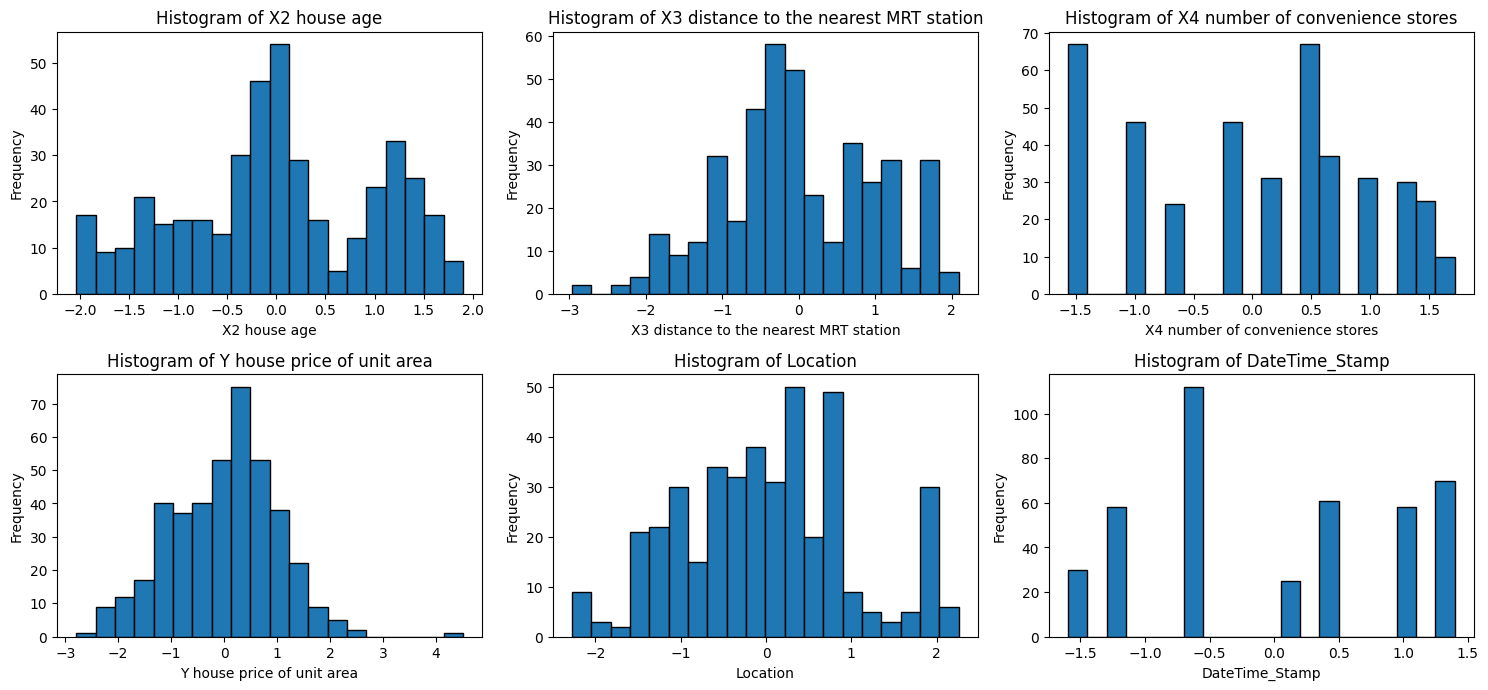

In [141]:
# 수치형 데이터 열 선택
# df_scaled에서 수치형 데이터를 선택하여 numeric_features에 저장
numeric_features = df_scaled.select_dtypes(include=['number']).columns

# 히스토그램을 그리기 위한 설정
# plt.figure(figsize=(15, 10))로 전체 그림 크기 설정
plt.figure(figsize=(15, 10))

# 수치형 데이터 열마다 히스토그램을 그리기
# enumerate(numeric_features, 1)을 사용하여 수치형 열을 순차적으로 접근하고, 인덱스(i)와 열 이름(col)을 가져옴
for i, col in enumerate(numeric_features, 1):
    # 3x3의 subplot grid에 각 히스토그램을 그리기
    plt.subplot(3, 3, i)  # 3x3 그리드에서 각 서브플롯의 위치를 지정
    plt.hist(df_scaled[col], bins=20, edgecolor='black')  # 각 열에 대해 히스토그램을 그리되, bins=20으로 구간을 20으로 설정
    plt.title(f'Histogram of {col}')  # 히스토그램 제목 설정
    plt.xlabel(col)  # x축 레이블을 열 이름으로 설정
    plt.ylabel('Frequency')  # y축 레이블을 'Frequency'로 설정

# 서브플롯 간의 간격을 자동으로 조정하여 겹침을 방지
plt.tight_layout()

# 히스토그램 출력
plt.show()


### 📊 숫자형 피처들의 히스토그램 그리기 코드 설명

이 코드는 df_scaled 데이터프레임에서 숫자형 피처들을 선택하여 각각에 대해 히스토그램을 그리는 작업을 수행합니다.

 구체적으로는, 숫자형 데이터의 분포를 시각적으로 확인할 수 있도록 돕는 시각화 방법입니다.

### 🎯 목적

이 코드의 목적은 각 수치형 변수에 대해 히스토그램을 생성하여, 변수들의 분포를 시각적으로 확인하는 것입니다. 이를 통해 데이터가 정규 분포를 따르는지,

왜곡된 분포를 가지는지 등을 파악할 수 있습니다. 이 정보는 이후 데이터 전처리나 모델링 시 중요한 기준이 될 수 있습니다.

### 📊 최종 결과

이 코드는 df_scaled 데이터프레임의 모든 수치형 변수에 대해 히스토그램을 그립니다.

각 히스토그램은 변수의 분포를 보여주며, 이 분포가 정규 분포와 얼마나 차이가 있는지를 시각적으로 확인할 수 있습니다.

3x3 그리드 레이아웃으로 각 변수에 대한 히스토그램이 정렬되어 표시됩니다.

### 🔑 요약

#### 목적: 

각 수치형 변수에 대해 히스토그램을 그려 데이터의 분포를 확인하기 위함.

#### 핵심 기능:

select_dtypes를 사용해 수치형 변수 선택.

3x3 그리드 형태로 히스토그램을 서브플롯으로 그리기.

각 히스토그램에 대한 제목, x축 및 y축 레이블 설정.

tight_layout으로 서브플롯 간 간격 조정 및 show로 시각화 결과 출력.

## 📊 선형 회귀 모델 훈련 및 예측

In [142]:
# 'Transaction Date' 열 삭제
# 이미 'Transaction Date'는 타겟 변수와 직접적인 연관이 없는 컬럼으로 판단되어 삭제
df_scaled = df_scaled.drop(columns=['Transaction Date'])

# 특성과 타겟 변수를 나눕니다.
# X는 독립 변수(특성)들로, 'Y house price of unit area' 열을 제외한 나머지 열들로 구성
X = df_scaled.drop(columns=['Y house price of unit area'])
# y는 종속 변수(타겟)인 'Y house price of unit area' 열
y = df_scaled['Y house price of unit area']

# 훈련 세트와 테스트 세트로 데이터를 나눕니다.
# train_test_split을 사용하여 80%는 훈련 세트, 20%는 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화
# LinearRegression 객체를 생성하여 선형 회귀 모델을 준비
model = LinearRegression()

# 모델 훈련
# 훈련 데이터(X_train, y_train)를 사용하여 선형 회귀 모델을 학습
model.fit(X_train, y_train)

# 예측
# 테스트 데이터(X_test)를 사용하여 타겟 변수(y_test)에 대한 예측 값을 생성
y_pred = model.predict(X_test)


### 📊 선형 회귀 모델 훈련 및 예측 코드 설명

### 🎯 목적

이 코드의 목적은 데이터셋에서 특징 변수(X)와 목표 변수(y)를 나눈 후, 선형 회귀 모델을 훈련시키고,

 이를 통해 목표 변수에 대한 예측을 수행하는 것입니다. 이 과정은 주택 가격 예측과 같은 문제에 유용합니다.

### 📊 최종 결과

훈련 세트: 

X_train, y_train은 모델을 학습하는 데 사용됩니다.

테스트 세트: 

X_test는 학습된 모델을 평가하는 데 사용되며, y_pred는 모델이 예측한 결과입니다. 

y_pred는 실제 값(y_test)과 비교하여 모델의 성능을 평가할 수 있는 지표를 계산하는 데 활용됩니다.

### 🔑 요약
이 코드는 다음과 같은 과정으로 구성됩니다:

Transaction Date 열을 제거하여 데이터를 정리합니다.

데이터에서 특성과 목표 변수를 나눕니다.

훈련 세트와 테스트 세트로 데이터를 분할합니다.

선형 회귀 모델을 초기화하고 훈련합니다.

훈련된 모델을 사용하여 테스트 세트에 대한 예측을 수행합니다.

## 📊 선형 회귀 모델 성능 평가

In [143]:
# 성능 평가

# 평균 제곱 오차 (MSE) 계산
# y_test는 실제 값, y_pred는 모델이 예측한 값
mse = mean_squared_error(y_test, y_pred)

# 평균 절대 오차 (MAE) 계산
# MAE는 실제 값과 예측 값 간의 차이의 절대값의 평균
mae = mean_absolute_error(y_test, y_pred)

# 평균 제곱 오차 (MSE)의 제곱근을 구하여 RMSE 계산
# RMSE는 모델의 예측 오차의 정도를 나타내는 지표로, 값이 작을수록 예측 성능이 좋은 것
rmse = np.sqrt(mse)

# 결정계수 (R²) 계산
# R²는 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표로, 1에 가까울수록 좋은 모델
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"Mean Squared Error (MSE): {mse}")  # MSE 출력
print(f"Root Mean Squared Error (RMSE): {rmse}")  # RMSE 출력
print(f"Mean Absolute Error (MAE): {mae}")  # MAE 출력
print(f"R² (결정계수): {r2}")  # R² 출력


Mean Squared Error (MSE): 0.28799625295102
Root Mean Squared Error (RMSE): 0.5366528234818299
Mean Absolute Error (MAE): 0.3751389710494689
R² (결정계수): 0.7078865550596531


| 성능 지표                              | 값     | 설명                                                                 |
| ---------------------------------- | ----- | ------------------------------------------------------------------ |
| **Mean Squared Error (MSE)**       | 0.288 | **평균 제곱 오차**: 예측 값과 실제 값 간의 평균 제곱 차이. 값이 작을수록 예측 정확도가 높음.          |
| **Root Mean Squared Error (RMSE)** | 0.537 | **루트 평균 제곱 오차**: 예측 오차의 크기를 실제 값의 단위로 나타낸 값. 값이 작을수록 예측 정확도가 높음.   |
| **Mean Absolute Error (MAE)**      | 0.375 | **평균 절대 오차**: 예측 값과 실제 값 간의 절대 오차의 평균. 값이 작을수록 평균적으로 더 정확한 예측을 의미. |
| **R² (결정계수)**                      | 0.708 | **결정 계수**: 모델이 데이터의 변동성을 얼마나 잘 설명하는지. 값이 1에 가까울수록 모델의 설명력이 높음.     |


### 📊 선형 회귀 모델 성능 평가 코드 설명

이 코드는 선형 회귀 모델의 성능을 평가하기 위한 지표들을 계산하고 출력하는 과정입니다. 

모델의 예측 성능을 평가하기 위해 다양한 오류 지표와 결정 계수를 사용합니다.

### 🎯 목적

이 코드의 목적은 모델의 예측 성능을 평가하는 것입니다.

이를 위해 네 가지 주요 성능 지표인 평균 제곱 오차(MSE), 평균 절대 오차(MAE), 루트 평균 제곱 오차(RMSE), **결정 계수(R²)** 를 계산하고 출력합니다.

이들 지표는 모델의 예측이 얼마나 정확한지, 예측 오차가 얼마나 큰지를 평가하는 데 도움이 됩니다.

### 📊 최종 결과

#### MSE (Mean Squared Error): 

예측 값과 실제 값 간의 평균 제곱 차이를 보여줍니다. 값이 작을수록 예측이 더 정확합니다.

#### RMSE (Root Mean Squared Error):

 MSE의 제곱근으로, 예측 오차의 크기를 실제 값의 단위로 나타냅니다. 값이 작을수록 예측 정확도가 높습니다.

#### MAE (Mean Absolute Error): 

예측 값과 실제 값 간의 절대 오차의 평균을 계산합니다. MAE가 작을수록 평균적으로 더 정확한 예측을 의미합니다.

#### R² (결정계수): 

모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다. 값이 1에 가까울수록 모델의 설명력이 높습니다.

### 🔑 요약

이 코드는 선형 회귀 모델의 성능을 평가하기 위해 네 가지 지표를 계산하고 출력합니다:

#### MSE: 

예측 값과 실제 값 간의 평균 제곱 차이

#### RMSE: 

예측 오차의 크기를 실제 값의 단위로 나타낸 값

#### MAE: 

평균 절대 오차

#### R²: 

모델의 설명력

### 📊 실제값 vs 예측값 시각화

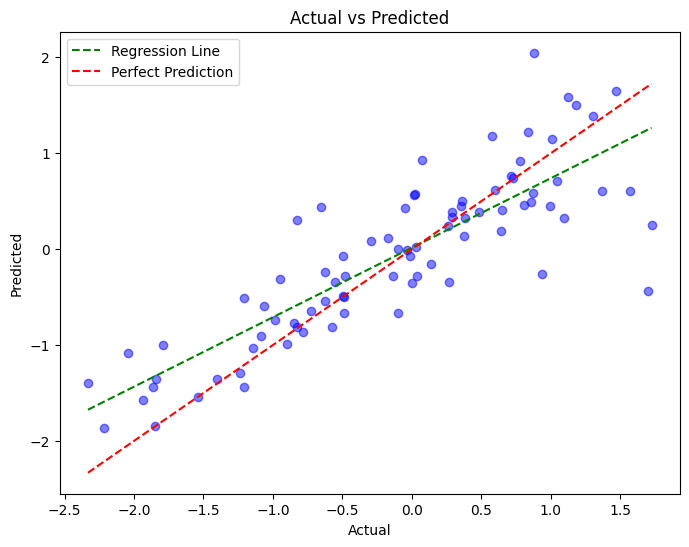

In [144]:
# 실제값 vs 예측값 시각화
# 시각화 크기 설정
plt.figure(figsize=(8, 6))

# 실제값(y_test)과 예측값(y_pred) 사이의 산점도를 그립니다.
# 각 점은 실제값과 예측값이 대응하는 위치에 표시됩니다.
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# 회귀선 추가
# y_test와 y_pred 사이의 선형 회귀를 수행하여 회귀선을 그립니다.
# np.polyfit()은 1차원 다항식(직선) 회귀를 구하는 함수입니다. 이 함수는 기울기(slope)와 y절편(intercept)을 계산합니다.
slope, intercept = np.polyfit(y_test, y_pred, 1)

# 회귀선을 그립니다. 회귀선은 실제값과 예측값 사이의 관계를 나타냅니다.
plt.plot([min(y_test), max(y_test)], [slope * min(y_test) + intercept, slope * max(y_test) + intercept], color='green', linestyle='--', label="Regression Line")

# 실제값 = 예측값 선
# 완벽한 예측을 의미하는 직선을 추가합니다. 이 선은 실제값과 예측값이 일치하는 경우를 나타냅니다.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")

# 제목, 레이블 추가
# 그래프에 제목을 추가합니다.
plt.title("Actual vs Predicted")
# x축 레이블을 'Actual'로 설정
plt.xlabel("Actual")
# y축 레이블을 'Predicted'로 설정
plt.ylabel("Predicted")
# 범례 추가 (회귀선과 완벽한 예측선의 라벨 표시)
plt.legend()

# 시각화 출력
plt.show()


### 📊 실제값 vs 예측값 시각화 코드 설명

이 코드는 선형 회귀 모델의 예측 결과를 실제 값과 비교하여 시각화하는 과정입니다.

이를 통해 모델이 얼마나 정확하게 예측했는지 시각적으로 확인할 수 있습니다.

### 🎯 목적

이 코드의 목적은 실제값 vs 예측값을 시각화하여, 모델의 예측 성능을 직관적으로 확인하는 것입니다.

 예측이 정확할수록 예측 값은 실제 값에 가까운 위치에 분포하게 됩니다.

### 🔑 최종 요약

#### 산점도:

실제 값과 예측 값이 어떻게 분포하는지를 보여줍니다. 점들이 대각선에 가까이 분포할수록 모델이 예측을 잘했다고 볼 수 있습니다.

#### 회귀선: 

실제 값과 예측 값 사이의 관계를 직선으로 나타냅니다. 이 선은 모델이 예측한 값과 실제 값 사이의 경향을 보여줍니다.

#### 완벽한 예측선:

 빨간색 점선은 실제 값 = 예측 값이 되는 완벽한 예측을 나타냅니다. 이 선에 가까운 점들이 많을수록 모델의 성능이 우수합니다.

### 제목과 레이블: 

그래프에 제목과 축 레이블을 추가하여 무엇을 나타내는지 명확하게 합니다.

## 📊 잔차(실제값 - 예측값) 시각화

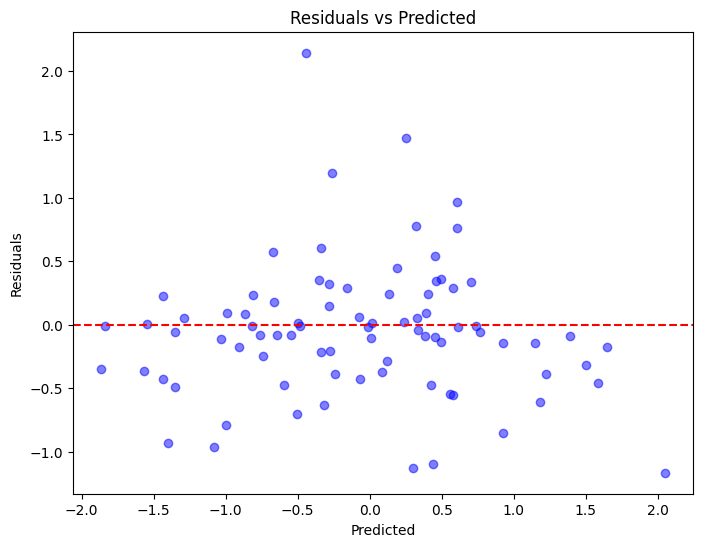

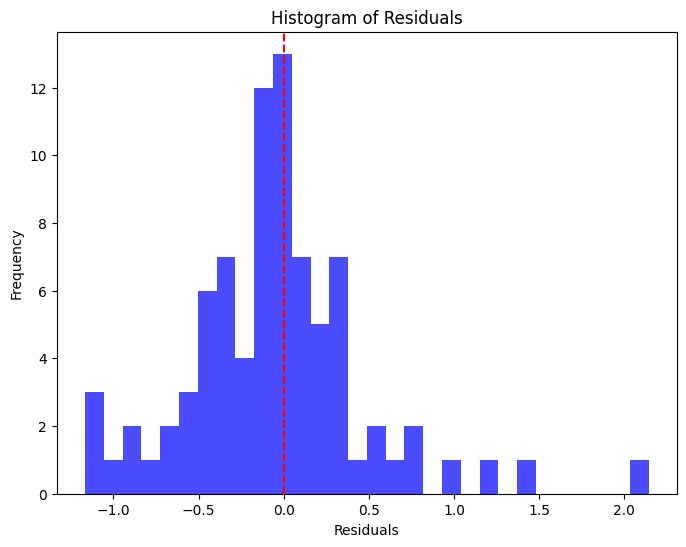

In [145]:
# 잔차(실제값 - 예측값) 계산
# 잔차는 모델의 예측값과 실제값의 차이를 나타냅니다. 잔차는 모델이 얼마나 정확한지, 또는 예측이 잘못된 부분이 어디인지 알 수 있게 합니다.
residuals = y_test - y_pred

# 잔차 시각화 (Residuals vs Predicted)
# 잔차는 예측값과 실제값의 차이이므로, 잔차와 예측값 간의 관계를 시각화합니다.
plt.figure(figsize=(8, 6))

# 예측값과 잔차를 산점도로 그립니다.
# x축은 예측값, y축은 잔차입니다.
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)

# 잔차가 0인 선 (기준선)을 추가합니다. 이 선은 예측값이 실제값과 정확히 일치할 때 잔차가 0이 된다는 의미입니다.
plt.axhline(y=0, color='red', linestyle='--')

# 제목과 레이블 추가
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

# 시각화 출력
plt.show()

# 잔차의 히스토그램 추가
# 잔차의 분포를 확인할 수 있는 히스토그램을 그립니다.
plt.figure(figsize=(8, 6))

# 잔차 값의 분포를 히스토그램으로 시각화합니다.
# 잔차가 어떻게 분포하는지 확인할 수 있습니다.
plt.hist(residuals, bins=30, color='blue', alpha=0.7)

# 잔차가 0인 위치에 빨간색 점선 추가 (잔차의 평균이 0일 경우 이 선을 기준으로 분포됩니다).
plt.axvline(x=0, color='red', linestyle='--')

# 제목과 레이블 추가
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# 시각화 출력
plt.show()


### 📊 잔차(실제값 - 예측값) 시각화 코드 설명

이 코드는 선형 회귀 모델에서 발생한 **잔차(residuals)** 를 시각화하여, 모델이 예측한 값과 실제 값 간의 차이를 분석하는 과정입니다. 

잔차를 분석하면 모델의 성능을 평가하고, 데이터에서 모델이 제대로 설명하지 못하는 부분을 확인할 수 있습니다.

### 🎯 목적

이 코드의 목적은 잔차를 시각화하여 모델의 예측 성능을 더 깊이 이해하고, 

예측 오차가 특정 패턴을 따르는지 또는 무작위로 분포하는지를 확인하는 것입니다.

### 🔑 최종 요약

#### 잔차 vs 예측값 산점도: 

예측값에 대한 잔차의 분포를 나타내며, 잔차가 무작위로 분포하는지, 특정 패턴을 따르는지를 확인할 수 있습니다. 

잔차가 무작위로 분포한다면 모델이 잘 학습된 것입니다.

#### 잔차 히스토그램: 

잔차의 분포를 시각화하여 모델의 예측 오차가 정규 분포를 따르는지, 비대칭적인지 확인할 수 있습니다. 

정규 분포를 따른다면 모델이 잘 맞춰졌다고 볼 수 있습니다.

### 빨간색 점선: 
잔차가 0인 위치로, 모델의 예측이 완벽한 경우 이 선을 기준으로 잔차가 분포해야 합니다.